<a href="https://colab.research.google.com/github/kirsten-fung/project_gss/blob/main/graph_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
! git clone https://github.com/kirsten-fung/project_gss

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/project_gss/cleaned_project_gss.csv')
# print(df.head())
# print(df.info())
# print(df.describe())

fatal: destination path 'project_gss' already exists and is not an empty directory.


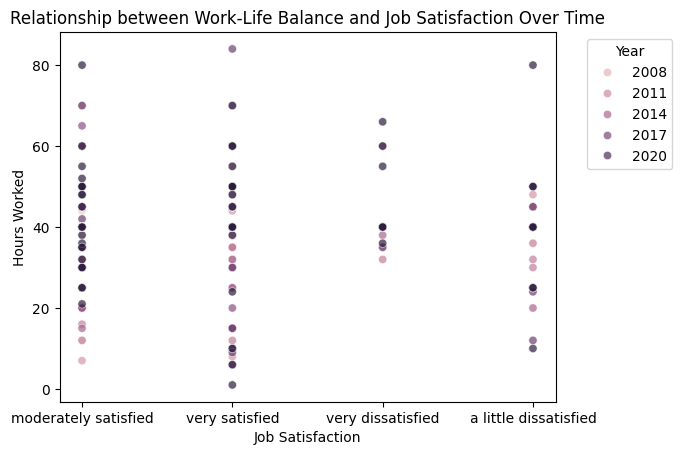

In [285]:
# Scatterplot
scatterplot = sns.scatterplot(x='job_satisfaction', y='hours_worked', hue='year', data=df, alpha=0.7)
plt.title('Relationship between Work-Life Balance and Job Satisfaction Over Time')
plt.xlabel('Job Satisfaction')
plt.ylabel('Hours Worked')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='job_satisfaction', ylabel='hours_worked'>

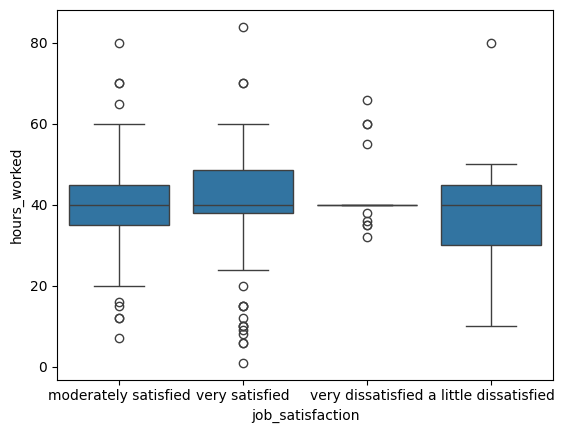

In [286]:
# Boxplot
sns.boxplot(data=df, x='job_satisfaction', y='hours_worked')

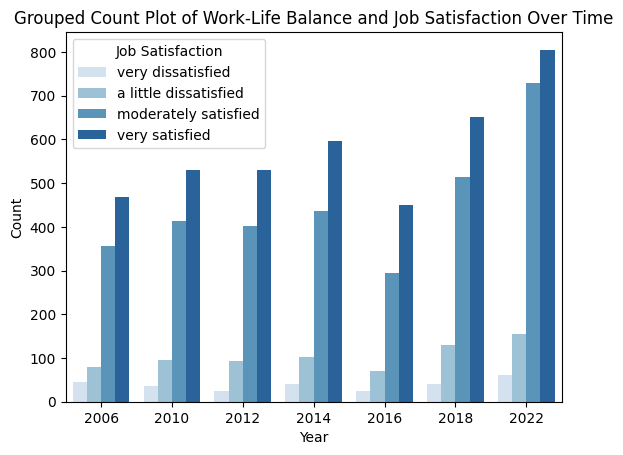

In [287]:
sat_order = ['very dissatisfied','a little dissatisfied','moderately satisfied','very satisfied']
plot_palette = sns.color_palette("Blues", len(sat_order))
count_plot = sns.countplot(data=df, x='year', hue='job_satisfaction',hue_order=sat_order,palette=plot_palette)
count_plot.set_title('Grouped Count Plot of Work-Life Balance and Job Satisfaction Over Time')
count_plot.set_xlabel('Year')
count_plot.set_ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

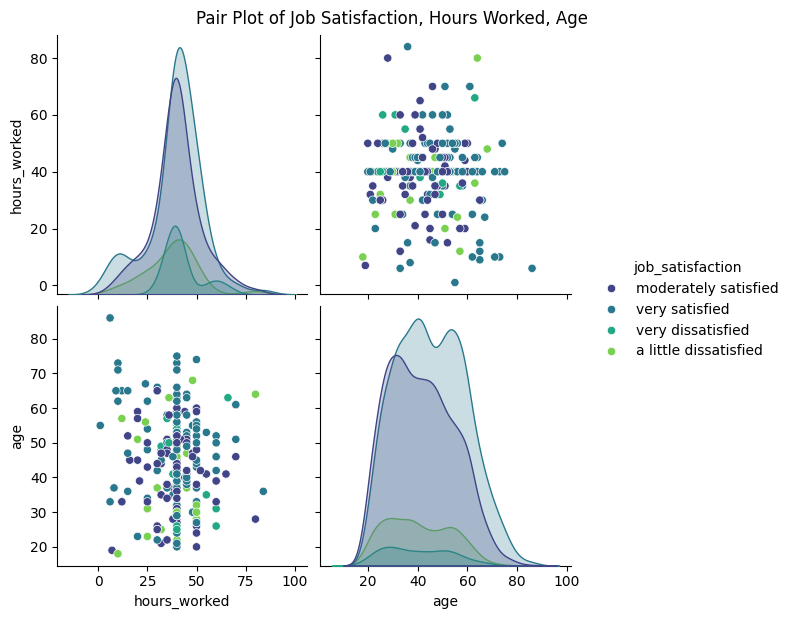

In [288]:
# Pairplot
selected_variables = ['job_satisfaction', 'hours_worked', 'age']
selected_df = df[selected_variables]
pair_plot = sns.pairplot(selected_df, hue='job_satisfaction', palette='viridis', height=3)
pair_plot.fig.suptitle('Pair Plot of Job Satisfaction, Hours Worked, Age', y=1.02)
plt.show()

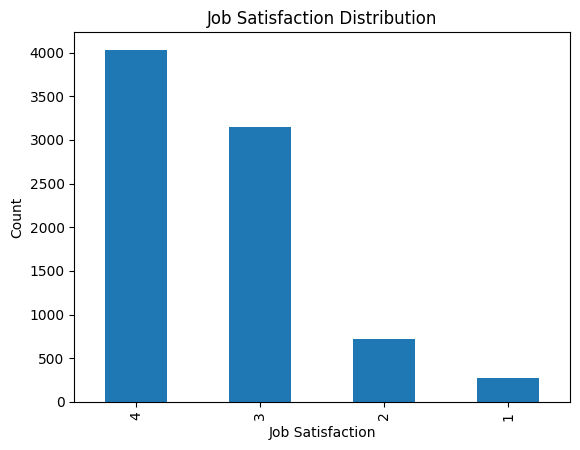

In [289]:
df['job_satisfaction'] = df['job_satisfaction'].replace(['very satisfied'], 4)
df['job_satisfaction'] = df['job_satisfaction'].replace(['moderately satisfied'], 3)
df['job_satisfaction'] = df['job_satisfaction'].replace(['a little dissatisfied'], 2)
df['job_satisfaction'] = df['job_satisfaction'].replace(['very dissatisfied'], 1)
df['job_satisfaction'].value_counts()
value_counts = df['job_satisfaction'].value_counts()

value_counts.plot(kind='bar')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Job Satisfaction Distribution')
plt.show()

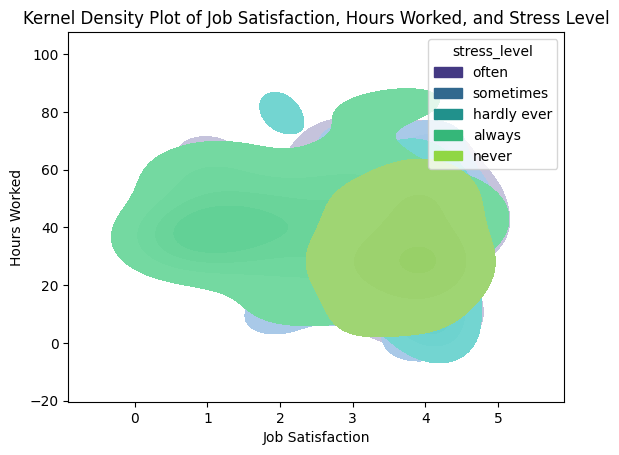

In [290]:
kde_plot = sns.kdeplot(data=df, x='job_satisfaction', y='hours_worked', hue='stress_level', fill=True, palette='viridis')
kde_plot.set_title('Kernel Density Plot of Job Satisfaction, Hours Worked, and Stress Level')
kde_plot.set_xlabel('Job Satisfaction')
kde_plot.set_ylabel('Hours Worked')
plt.show()

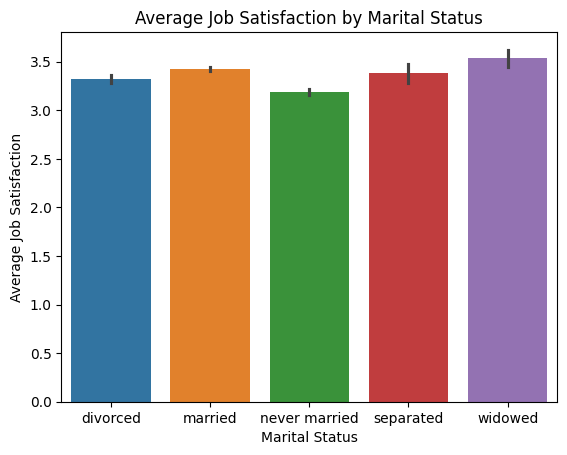

In [291]:
barplot_marital = sns.barplot(x='marital_status', y='job_satisfaction', hue='marital_status', data=df, dodge=False)
barplot_marital.set_title('Average Job Satisfaction by Marital Status')
barplot_marital.set_xlabel('Marital Status')
barplot_marital.set_ylabel('Average Job Satisfaction')
plt.show()

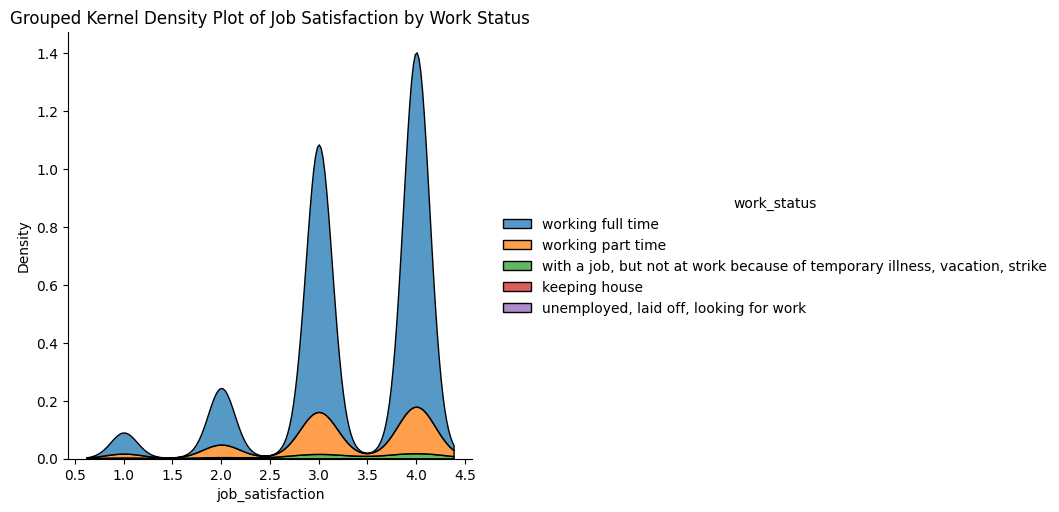

In [292]:
sns.displot(data=df, x='job_satisfaction', hue='work_status', kind='kde', multiple='stack')
plt.title('Grouped Kernel Density Plot of Job Satisfaction by Work Status')
plt.show()

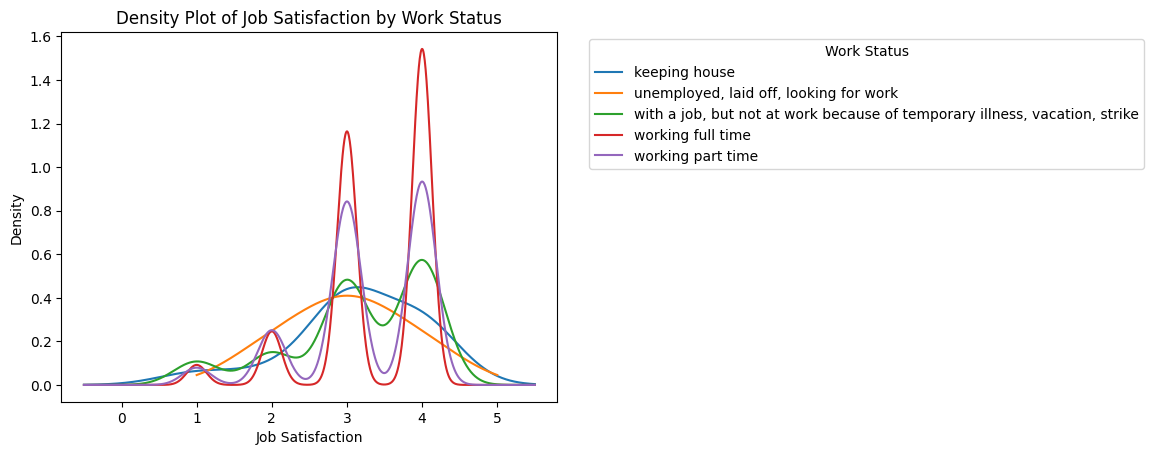

In [293]:
group_by = 'work_status'
var = 'job_satisfaction'
df = df.pivot(columns=group_by,values=var)
df.plot.density()
plt.title('Density Plot of Job Satisfaction by Work Status')
plt.xlabel('Job Satisfaction')
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()